### Imports

In [41]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from datetime import datetime
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

## Plotting and Observing Patterns

In [42]:
# our dataset
train = pd.read_csv("train.csv")
print(train.columns)
train.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


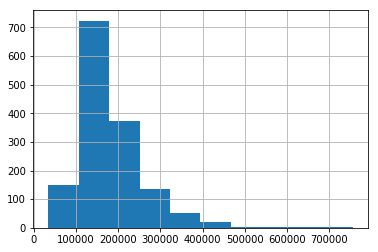

In [44]:
train["SalePrice"].hist()

C:\Users\Rahul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


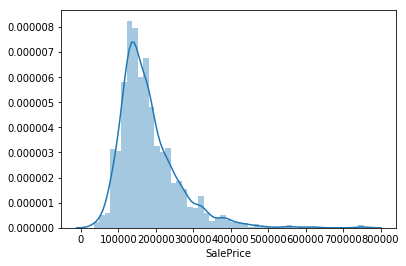

In [45]:
sns.distplot(train['SalePrice'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA8F464BE0>,
      dtype=object)

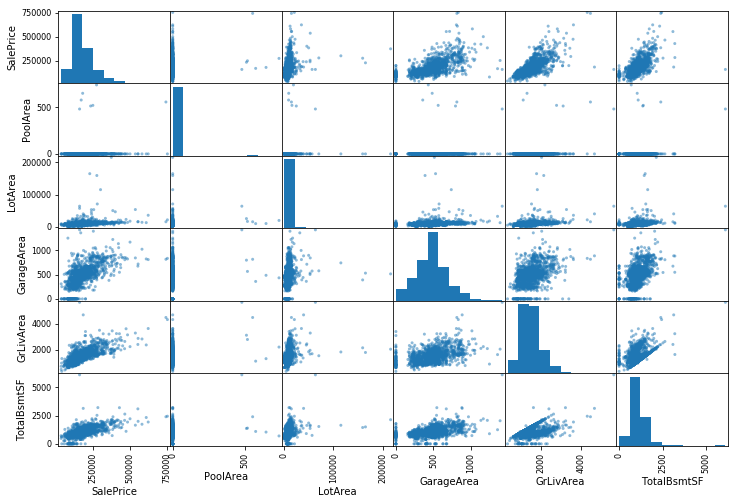

In [46]:
attributes_of_interest = ["SalePrice", "PoolArea", "LotArea", "GarageArea",
                         "GrLivArea", "TotalBsmtSF"]
scatter_matrix(train[attributes_of_interest], figsize=(12, 8))

Ok so GarageArea, GrLivArea and TotalBsmtSF seem like they have a linear relationship with SalePrice

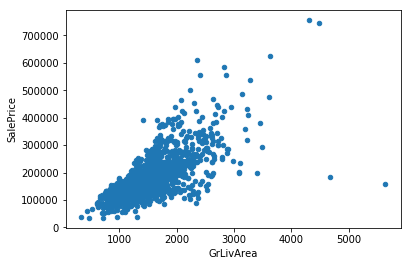

In [47]:
train.plot(kind="scatter", x="GrLivArea", y="SalePrice")

### Analyzing categorical data

In [48]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

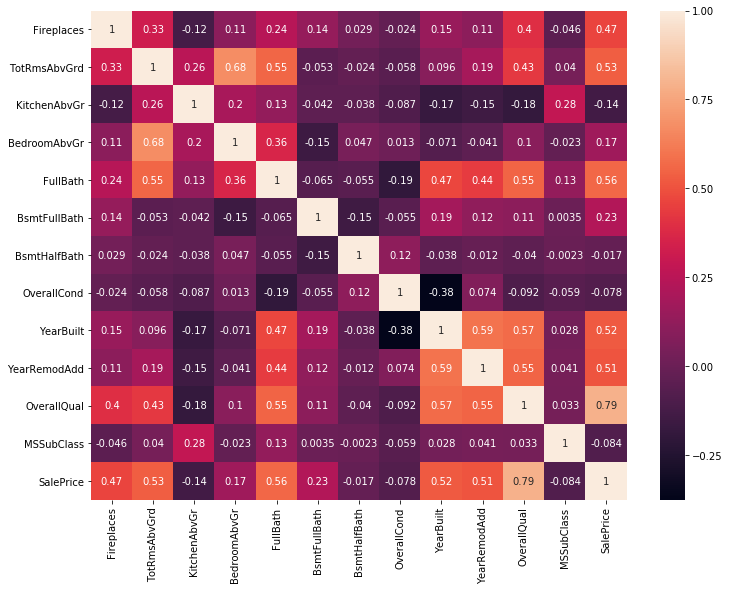

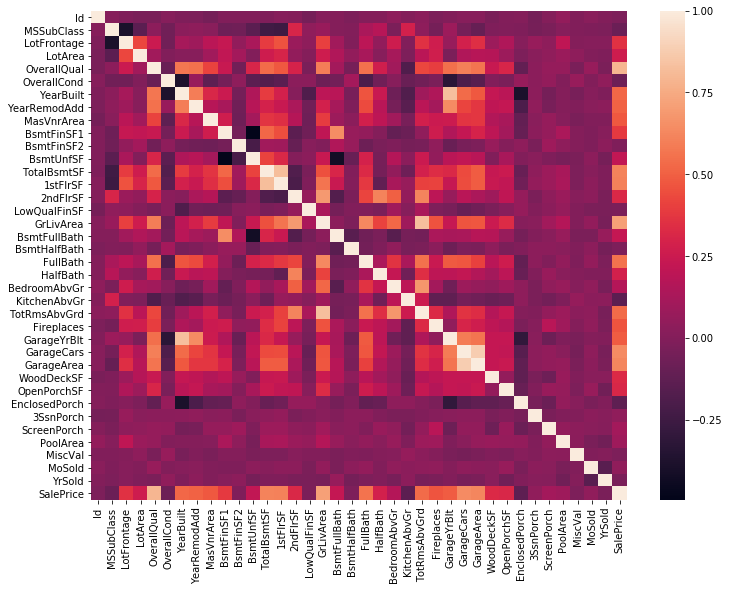

In [49]:
cat_attr = ['SaleCondition', 'SaleType', 'MiscFeature',
           'Fence', 'PoolQC', 'PavedDrive', 'GarageCond',
           'GarageQual', 'GarageFinish', 'GarageType',
           'FireplaceQu', 'Functional','Fireplaces', 
           'Functional', 'TotRmsAbvGrd', 'KitchenAbvGr', 
           'KitchenQual', 'BedroomAbvGr', 'FullBath', 
            'BsmtFullBath', 'BsmtHalfBath', 'Electrical',
           'CentralAir', 'HeatingQC', 'Heating', 
           'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure',
           'BsmtCond', 'BsmtQual', 'Foundation', 'ExterCond',
           'ExterQual', 'MasVnrType', 'Exterior1st',
           'Exterior2nd', 'RoofMatl', 'RoofStyle', 'OverallCond',
           'YearBuilt', 'YearRemodAdd', 'OverallQual', 'HouseStyle',
           'BldgType', 'Condition1', 'Condition2', 'Neighborhood',
           'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 
           'LotShape', 'Alley', 'Street', 'MSZoning', 'MSSubClass', 'SalePrice']

cat_corr_mat = train[cat_attr].corr()
plt.figure(figsize=(12,9))
ax = sns.heatmap(cat_corr_mat, annot=True)
plt.show()

corr_mat = train.corr()
plt.figure(figsize=(12,9))
ax = sns.heatmap(corr_mat)
plt.show()

In [50]:
def graph_check_cat_train(var: str, X: "DataFrame"):
    check_cat_train = pd.concat([X["SalePrice"],
                                           X[var]], 
                                            axis=1)
    plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
    ax = sns.scatterplot(x=var, y="SalePrice", data=check_cat_train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
    ax = sns.boxplot(x=var, y="SalePrice", data=check_cat_train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

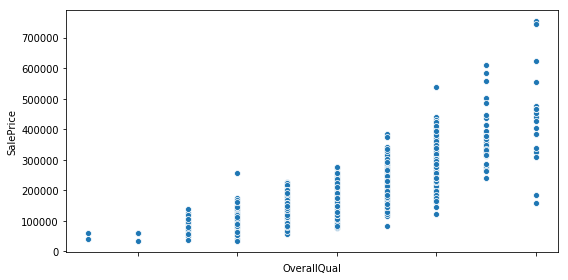

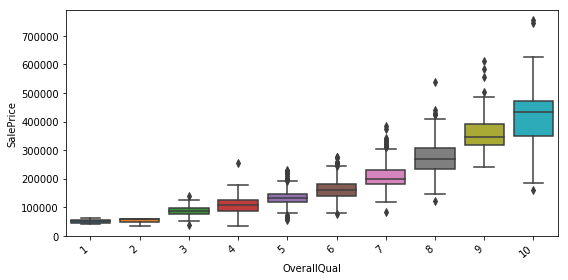

In [51]:
# OverallQual is categorical cus yeet
'''
check_cat_train = pd.concat([train["SalePrice"],
                                       train["OverallQual"]], 
                                        axis=1) '''
graph_check_cat_train('OverallQual', train)

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


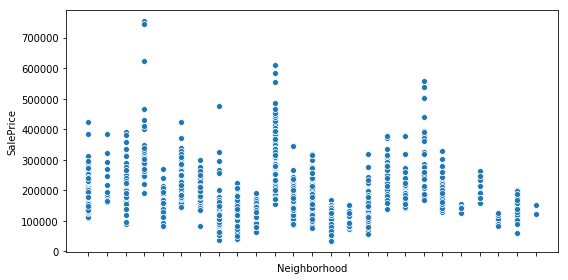

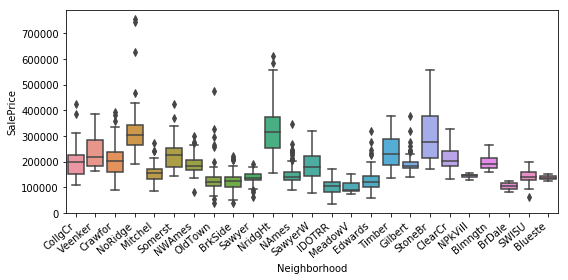

In [52]:
print(train["MiscFeature"].unique())
print(train["Neighborhood"].unique())
graph_check_cat_train('Neighborhood', train)

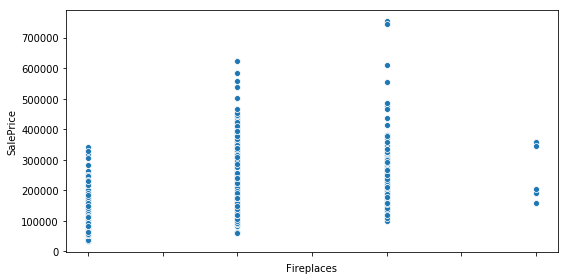

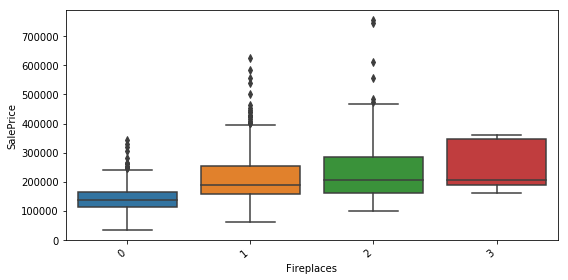

In [53]:
graph_check_cat_train('Fireplaces', train)

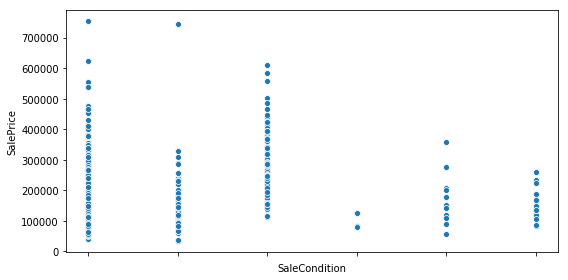

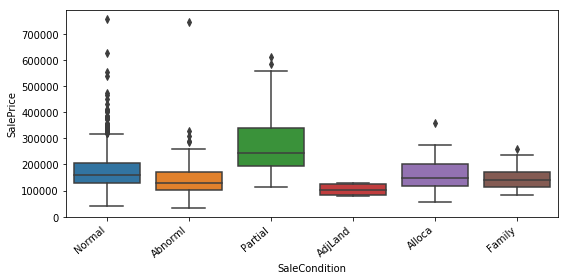

In [54]:
graph_check_cat_train("SaleCondition", train)

We see that Partial does the best <br>
Normal	 Normal Sale <br>
       Abnorml	 Abnormal Sale -  trade, foreclosure, short sale <br>
       AdjLand	 Adjoining Land Purchase <br>
       Alloca	 Allocation - two linked properties with separate deeds,  typically condo with a garage unit <br>	
       Family	 Sale between family members <br>
       Partial	 Home was not completed when last assessed (associated with New Homes) <br>

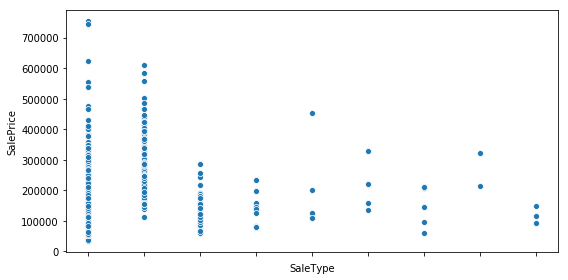

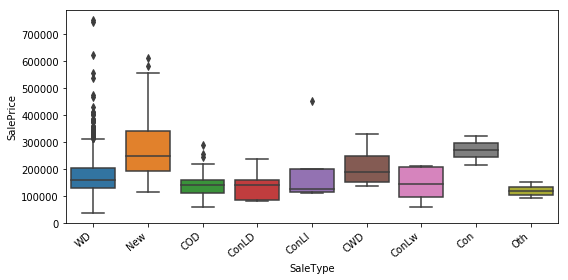

In [55]:
graph_check_cat_train('SaleType', train)

We See that New does the best <br>
    WD 	Warranty Deed - Conventional <br>
       CWD	Warranty Deed - Cash <br>
       VWD	Warranty Deed - VA Loan <br>
       New	Home just constructed and sold<br>
       COD	Court Officer Deed/Estate<br>
       Con	Contract 15% Down payment regular terms<br>
       ConLw	Contract Low Down payment and low interest<br>
       ConLI	Contract Low Interest<br>
       ConLD	Contract Low Down<br>
       Oth	Other

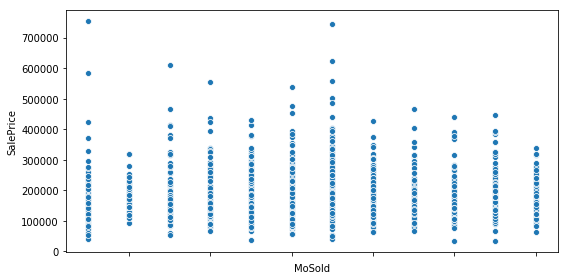

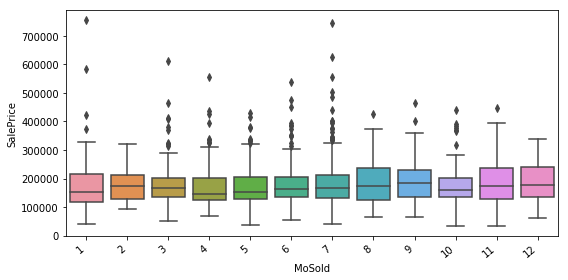

In [56]:
graph_check_cat_train('MoSold', train)

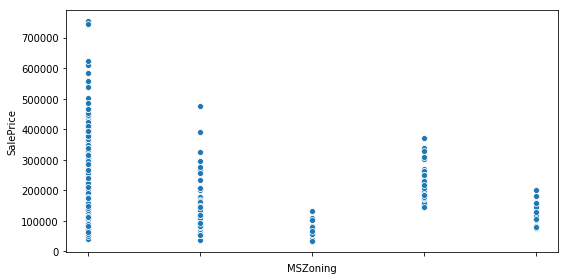

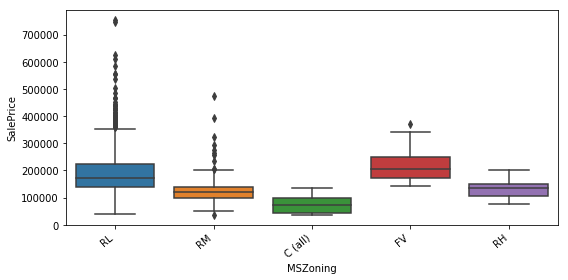

In [57]:
graph_check_cat_train("MSZoning", train)

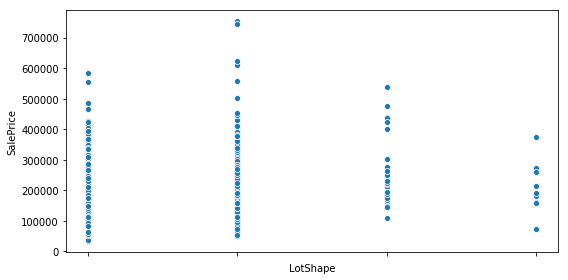

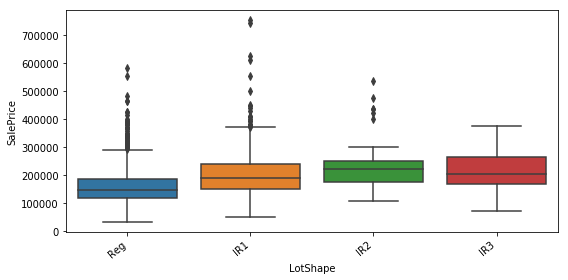

In [58]:
graph_check_cat_train("LotShape", train)

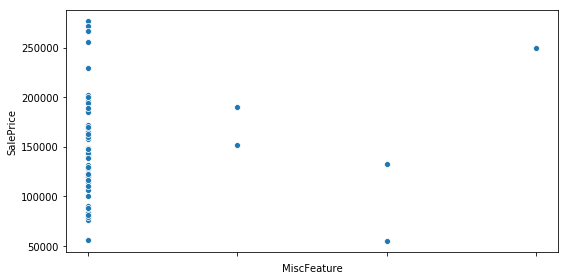

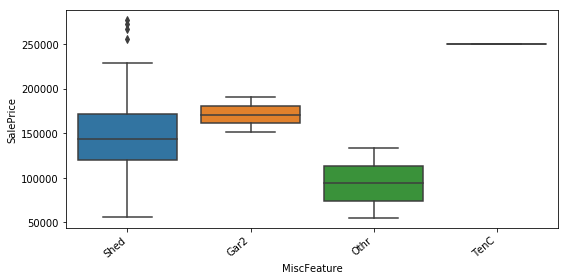

In [59]:
graph_check_cat_train('MiscFeature', train)

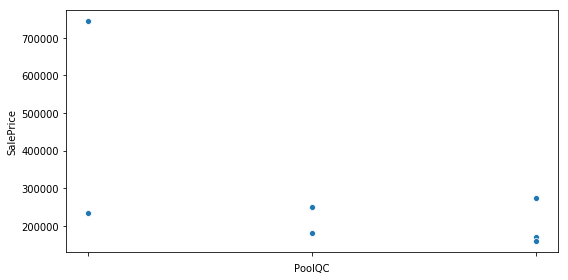

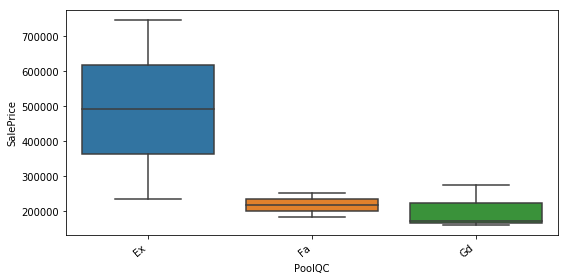

In [60]:
# fence is weak, so don't bother with it
graph_check_cat_train("PoolQC", train)

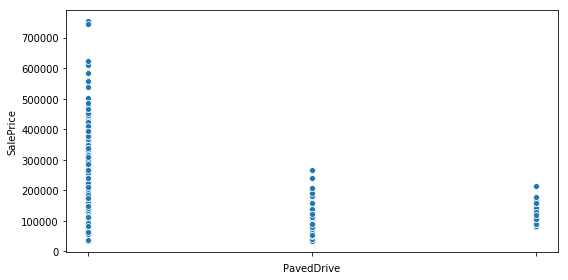

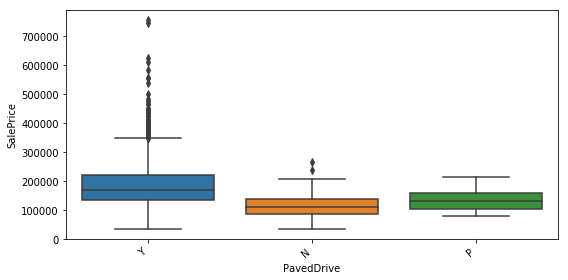

In [61]:
graph_check_cat_train("PavedDrive", train)

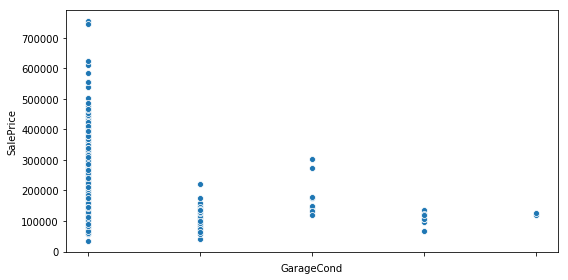

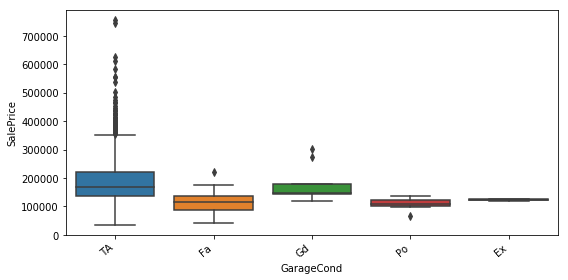

In [62]:
graph_check_cat_train("GarageCond", train)

## Closer Look at SalePrice Correlation matrix

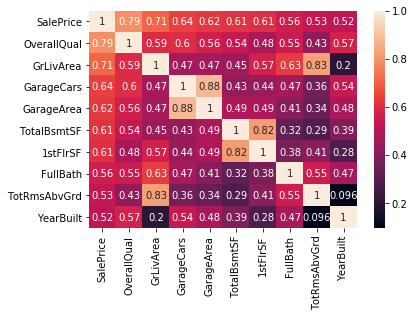

In [63]:
corr_mat = train.corr()
cols = corr_mat.nlargest(10, 'SalePrice').index
cm = np.corrcoef(train[cols].values.T)
cm
sns.heatmap(cm, annot=True, yticklabels=cols.values,
            xticklabels=cols.values)

We see that OverallQual, GrLivArea, and GarageCars have good linear relationships with SalePrice. We can probably create a new feature combining GarageArea and GarageCars Ga <br>
Furthermore, TotalBsmtSF and 1stFlrSF are also correlated, so uhm uh again I could create a new feature combining them.

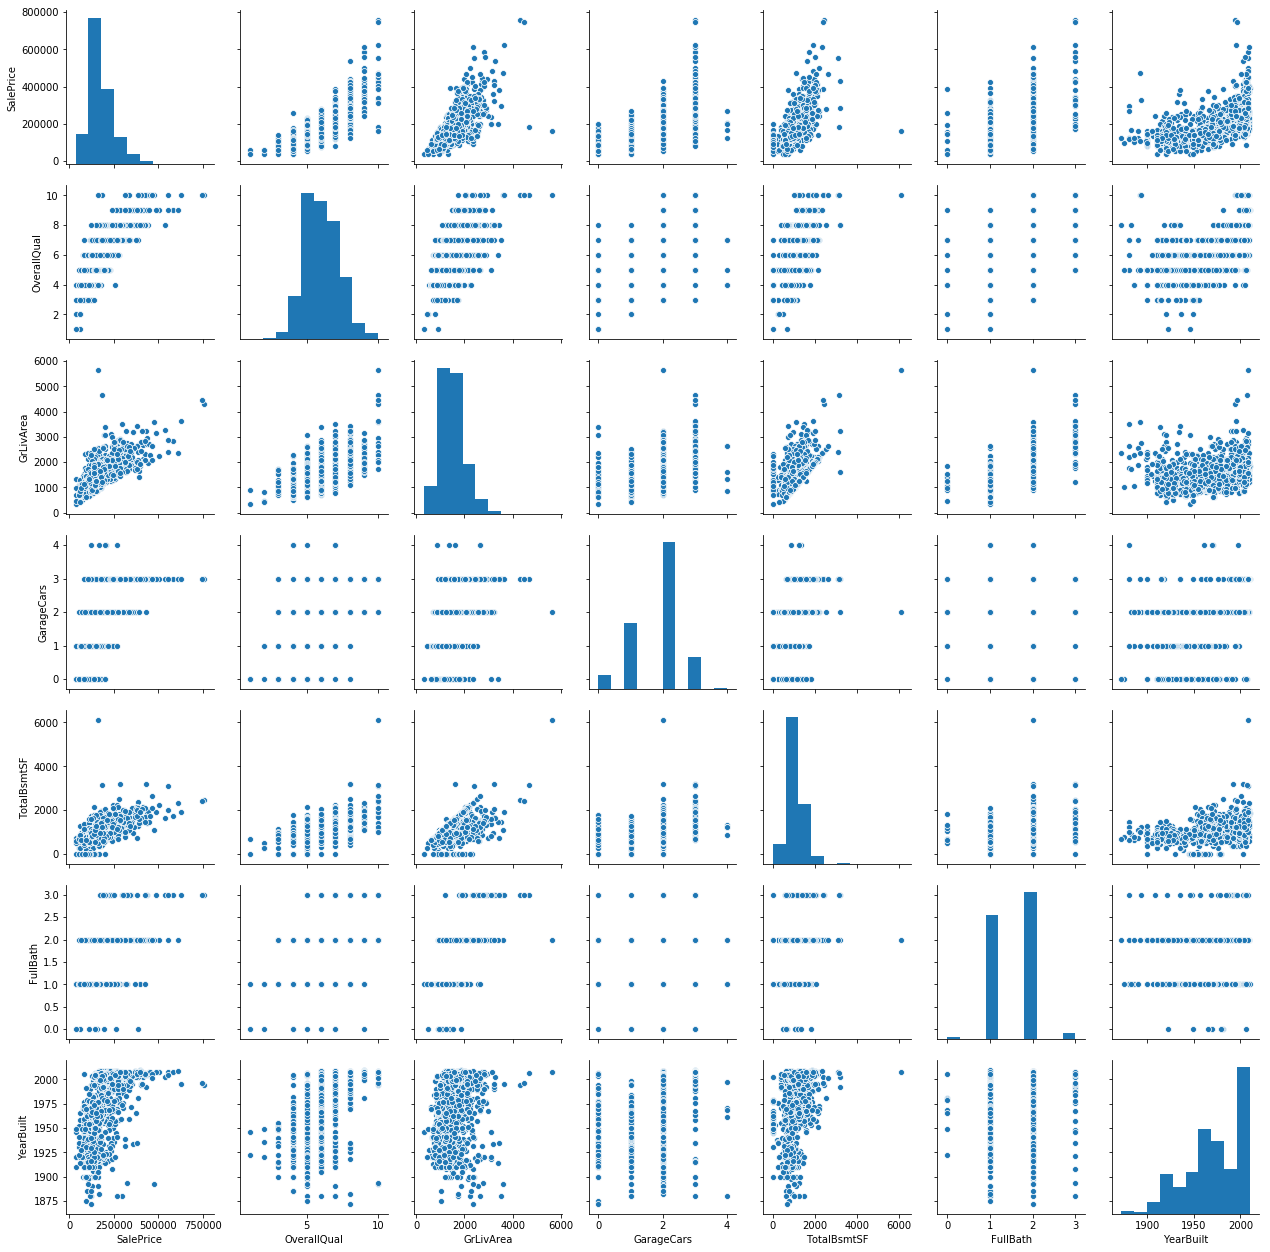

In [64]:
# before I used pandas for scatter_matrix, here's how to do it in
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height=2.5)

## Seperating categorical and numerical data

In [65]:
cat_attr = ['SaleCondition', 'SaleType', 'MiscFeature',
           'Fence', 'PoolQC', 'PavedDrive', 'GarageCond',
           'GarageQual', 'GarageFinish', 'GarageType', "GarageCars", "GarageYrBlt",
           'FireplaceQu', 'Functional','Fireplaces', 
           'Functional', 'TotRmsAbvGrd', 'KitchenAbvGr', 
           'KitchenQual', 'BedroomAbvGr', 'FullBath', 
            'BsmtFullBath', 'BsmtHalfBath', 'Electrical',
           'CentralAir', 'HeatingQC', 'Heating', 
           'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure',
           'BsmtCond', 'BsmtQual', 'Foundation', 'ExterCond',
           'ExterQual', 'MasVnrType', 'Exterior1st',
           'Exterior2nd', 'RoofMatl', 'RoofStyle', 'OverallCond',
           'YearBuilt', 'YearRemodAdd', 'OverallQual', 'HouseStyle',
           'BldgType', 'Condition1', 'Condition2', 'Neighborhood',
           'LandSlope', 'LotConfig', 'Utilities', 'LandContour', 
           'LotShape', 'Alley', 'Street', 'MSZoning', 'MSSubClass']
cat_train = train[cat_attr]
cat_train

,SaleCondition,SaleType,MiscFeature,Fence,PoolQC,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,GarageCars,GarageYrBlt,FireplaceQu,Functional,Fireplaces,Functional,TotRmsAbvGrd,KitchenAbvGr,KitchenQual,BedroomAbvGr,FullBath,BsmtFullBath,BsmtHalfBath,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior1st,Exterior2nd,RoofMatl,RoofStyle,OverallCond,YearBuilt,YearRemodAdd,OverallQual,HouseStyle,BldgType,Condition1,Condition2,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Alley,Street,MSZoning,MSSubClass
0,Normal,WD,NaN,NaN,NaN,Y,TA,TA,RFn,Attchd,2,2003.0,NaN,Typ,0,Typ,8,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2003,2003,7,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,Reg,NaN,Pave,RL,60
1,Normal,WD,NaN,NaN,NaN,Y,TA,TA,RFn,Attchd,2,1976.0,TA,Typ,1,Typ,6,1,TA,3,2,0,1,SBrkr,Y,Ex,GasA,ALQ,Unf,Gd,TA,Gd,CBlock,TA,TA,None,MetalSd,MetalSd,CompShg,Gable,8,1976,1976,6,1Story,1Fam,Feedr,Norm,Veenker,Gtl,FR2,AllPub,Lvl,Reg,NaN,Pave,RL,20
2,Normal,WD,NaN,NaN,NaN,Y,TA,TA,RFn,Attchd,2,2001.0,TA,Typ,1,Typ,6,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Mn,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2001,2002,7,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,IR1,NaN,Pave,RL,60
3,Abnorml,WD,NaN,NaN,NaN,Y,TA,TA,Unf,Detchd,3,1998.0,Gd,Typ,1,Typ,7,1,Gd,3,1,1,0,SBrkr,Y,Gd,GasA,ALQ,Unf,No,Gd,TA,BrkTil,TA,TA,None,Wd Sdng,Wd Shng,CompShg,Gable,5,1915,1970,7,2Story,1Fam,Norm,Norm,Crawfor,Gtl,Corner,AllPub,Lvl,IR1,NaN,Pave,RL,70
4,Normal,WD,NaN,NaN,NaN,Y,TA,TA,RFn,Attchd,3,2000.0,TA,Typ,1,Typ,9,1,Gd,4,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Av,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2000,2000,8,2Story,1Fam,Norm,Norm,NoRidge,Gtl,FR2,AllPub,Lvl,IR1,NaN,Pave,RL,60
5,Normal,WD,Shed,MnPrv,NaN,Y,TA,TA,Unf,Attchd,2,1993.0,NaN,Typ,0,Typ,5,1,TA,1,1,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,Gd,Wood,TA,TA,None,VinylSd,VinylSd,CompShg,Gable,5,1993,1995,5,1.5Fin,1Fam,Norm,Norm,Mitchel,Gtl,Inside,AllPub,Lvl,IR1,NaN,Pave,RL,50
6,Normal,WD,NaN,NaN,NaN,Y,TA,TA,RFn,Attchd,2,2004.0,Gd,Typ,1,Typ,7,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Av,TA,Ex,PConc,TA,Gd,Stone,VinylSd,VinylSd,CompShg,Gable,5,2004,2005,8,1Story,1Fam,Norm,Norm,Somerst,Gtl,Inside,AllPub,Lvl,Reg,NaN,Pave,RL,20
7,Normal,WD,Shed,NaN,NaN,Y,TA,TA,RFn,Attchd,2,1973.0,TA,Typ,2,Typ,7,1,TA,3,2,1,0,SBrkr,Y,Ex,GasA,ALQ,BLQ,Mn,TA,Gd,CBlock,TA,TA,Stone,HdBoard,HdBoard,CompShg,Gable,6,1973,1973,7,2Story,1Fam,PosN,Norm,NWAmes,Gtl,Corner,AllPub,Lvl,IR1,NaN,Pave,RL,60
8,Abnorml,WD,NaN,NaN,NaN,Y,TA,Fa,Unf,Detchd,2,1931.0,TA,Min1,2,Min1,8,2,TA,2,2,0,0,FuseF,Y,Gd,GasA,Unf,Unf,No,TA,TA,BrkTil,TA,TA,None,BrkFace,Wd Shng,CompShg,Gable,5,1931,1950,7,1.5Fin,1Fam,Artery,Norm,OldTown,Gtl,Inside,AllPub,Lvl,Reg,NaN,Pave,RM,50
9,Normal,WD,NaN,NaN,NaN,Y,TA,Gd,RFn,Attchd,1,1939.0,TA,Typ,2,Typ,5,2,TA,2,1,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,TA,BrkTil,TA,TA,None,MetalSd,MetalSd,CompShg,Gable,6,1939,1950,5,1.5Unf,2fmCon,Artery,Artery,BrkSide,Gtl,Corner,AllPub,Lvl,Reg,NaN,Pave,RL,190


In [66]:
num_attr = list(train.columns.difference(cat_attr))
num_attr.remove('Id')
print(num_attr)
num_train = train[num_attr]
num_train

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YrSold']


,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,GrLivArea,HalfBath,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotalBsmtSF,WoodDeckSF,YrSold
0,856,854,0,706,0,150,0,548,1710,1,8450,65.0,0,196.0,0,2,61,0,208500,0,856,0,2008
1,1262,0,0,978,0,284,0,460,1262,0,9600,80.0,0,0.0,0,5,0,0,181500,0,1262,298,2007
2,920,866,0,486,0,434,0,608,1786,1,11250,68.0,0,162.0,0,9,42,0,223500,0,920,0,2008
3,961,756,0,216,0,540,272,642,1717,0,9550,60.0,0,0.0,0,2,35,0,140000,0,756,0,2006
4,1145,1053,0,655,0,490,0,836,2198,1,14260,84.0,0,350.0,0,12,84,0,250000,0,1145,192,2008
5,796,566,320,732,0,64,0,480,1362,1,14115,85.0,0,0.0,700,10,30,0,143000,0,796,40,2009
6,1694,0,0,1369,0,317,0,636,1694,0,10084,75.0,0,186.0,0,8,57,0,307000,0,1686,255,2007
7,1107,983,0,859,32,216,228,484,2090,1,10382,NaN,0,240.0,350,11,204,0,200000,0,1107,235,2009
8,1022,752,0,0,0,952,205,468,1774,0,6120,51.0,0,0.0,0,4,0,0,129900,0,952,90,2008
9,1077,0,0,851,0,140,0,205,1077,0,7420,50.0,0,0.0,0,1,4,0,118000,0,991,0,2008


## Deal with missing values

In [67]:
train = pd.read_csv("train.csv")
check_nan = train.isnull().any()
check_nan[check_nan == True]

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

For some of the above features, NaN is a valid value; it represents the lack of something. However, this is inconviniet for us, so I'm going to replace the NaN's with the appropriate category. 

### Dealing with values that are not supposed to have NaN

In [68]:
check_nan[check_nan == True]

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

Categorical: Alley, BsmtQual, BsmtCond, BsmtExposture, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature, MasVnrType[], Electrical[], GarageYrBlt[] <br>

Numerical: LotFrontage[], MasVnrArea[], 

[] - means it's not supposed to have NaN values

In [69]:
# ok so there are 81 NaN values for the stuff below,
# so most likeley the NaN years of garage mean there's no
# garage
# train[train["GarageYrBlt"].isnull()]["GarageYrBlt"]
# train[train["GarageType"].isnull()]["GarageType"]

train[train["LotFrontage"].isnull()]["BldgType"]

7         1Fam
12        1Fam
14        1Fam
16        1Fam
24        1Fam
31        1Fam
42        1Fam
43        1Fam
50        1Fam
64        1Fam
66        1Fam
76        1Fam
84        1Fam
95        1Fam
100       1Fam
104       1Fam
111       1Fam
113       1Fam
116       1Fam
120       1Fam
126     TwnhsE
131       1Fam
133       1Fam
136       1Fam
147       1Fam
149       1Fam
152       1Fam
153       1Fam
160       1Fam
166       1Fam
         ...  
1300      1Fam
1301      1Fam
1309      1Fam
1312      1Fam
1318      1Fam
1321      1Fam
1342      1Fam
1346      1Fam
1348      1Fam
1354      1Fam
1356      1Fam
1357      1Fam
1358     Twnhs
1362      1Fam
1365      1Fam
1368    TwnhsE
1373      1Fam
1381      1Fam
1383      1Fam
1396      1Fam
1407      1Fam
1417      1Fam
1419      1Fam
1423      1Fam
1424      1Fam
1429      1Fam
1431    TwnhsE
1441    TwnhsE
1443      1Fam
1446      1Fam
Name: BldgType, Length: 259, dtype: object

## Having a go with a transformation pipeline

### Pipeline for numerical

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                        ("std_scaler", StandardScaler())
                        ])
print(num_pipeline)
temp = num_pipeline.fit_transform(num_train)
num_train_2 = pd.DataFrame(temp, columns=num_train.columns)
num_train_2

Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])


,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,GrLivArea,HalfBath,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotalBsmtSF,WoodDeckSF,YrSold
0,-0.793434,1.161852,-0.116339,0.575425,-0.288653,-0.944591,-0.359325,0.351000,0.370333,1.227585,-0.207142,-2.293718e-01,-0.120242,0.511418,-0.087688,-1.599111,0.216503,-0.068692,0.347273,-0.270208,-0.459303,-0.752176,0.138777
1,0.257140,-0.795163,-0.116339,1.171992,-0.288653,-0.641228,-0.359325,-0.060731,-0.482512,-0.761621,-0.091886,4.519361e-01,-0.120242,-0.574410,-0.087688,-0.489110,-0.704483,-0.068692,0.007288,-0.270208,0.466465,1.626195,-0.614439
2,-0.627826,1.189351,-0.116339,0.092907,-0.288653,-0.301643,-0.359325,0.631726,0.515013,1.227585,0.073480,-9.311018e-02,-0.120242,0.323060,-0.087688,0.990891,-0.070361,-0.068692,0.536154,-0.270208,-0.313369,-0.752176,0.138777
3,-0.521734,0.937276,-0.116339,-0.499274,-0.288653,-0.061670,4.092524,0.790804,0.383659,-0.761621,-0.096897,-4.564744e-01,-0.120242,-0.574410,-0.087688,-1.599111,-0.176048,-0.068692,-0.515281,-0.270208,-0.687324,-0.752176,-1.367655
4,-0.045611,1.617877,-0.116339,0.463568,-0.288653,-0.174865,-0.359325,1.698485,1.299326,1.227585,0.375148,6.336182e-01,-0.120242,1.364570,-0.087688,2.100892,0.563760,-0.068692,0.869843,-0.270208,0.199680,0.780197,0.138777
5,-0.948691,0.501875,10.802446,0.632450,-0.288653,-1.139286,-0.359325,0.032844,-0.292145,1.227585,0.360616,6.790387e-01,-0.120242,-0.574410,1.323736,1.360892,-0.251539,-0.068692,-0.477505,-0.270208,-0.596115,-0.432931,0.891994
6,1.374993,-0.795163,-0.116339,2.029558,-0.288653,-0.566519,-0.359325,0.762732,0.339875,-0.761621,-0.043379,2.248335e-01,-0.120242,0.456019,-0.087688,0.620891,0.156111,-0.068692,1.587588,-0.270208,1.433276,1.283007,-0.614439
7,-0.143941,1.457466,-0.116339,0.910994,-0.090220,-0.795173,3.372372,0.051559,1.093729,1.227585,-0.013513,6.454645e-16,-0.120242,0.755176,0.618024,1.730892,2.375537,-0.068692,0.240241,-0.270208,0.113032,1.123385,0.891994
8,-0.363889,0.928110,-0.116339,-0.973018,-0.288653,0.871057,2.995929,-0.023301,0.492168,-0.761621,-0.440659,-8.652591e-01,-0.120242,-0.574410,-0.087688,-0.859110,-0.704483,-0.068692,-0.642461,-0.270208,-0.240402,-0.033876,0.138777
9,-0.221569,-0.795163,-0.116339,0.893448,-0.288653,-0.967230,-0.359325,-1.253816,-0.834691,-0.761621,-0.310370,-9.106796e-01,-0.120242,-0.574410,-0.087688,-1.969111,-0.644091,-0.068692,-0.792306,-0.270208,-0.151473,-0.752176,0.138777


### Pipeline for categorical

Categorical: Alley, BsmtQual, BsmtCond, BsmtExposture, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature, 
<br>MasVnrType
<br>Electrical 
<br>GarageYrBlt

### Dealing with categorical data that shouldn't have NaN

For this, the strategy I'm going to employ is to create a custom Imputer that replaces NaN with the most frequent value

In [71]:
# thanks to the help of stackexchange
# https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
from sklearn.base import TransformerMixin

class CategoricalMeanImputer(TransformerMixin):
    
    def __init__(self, cols: list):
        self.cols = cols
    
    def fit(self):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for col in self.cols:
            mode = X_copy[col].value_counts().iloc[0]
            X[cols].fillna(mode)
            
        return X_copy
    
    
    
    

In [72]:
# this is essentailly what the code above does
mode = cat_train["Fence"].value_counts().iloc[0]
cat_train["Fence"].fillna(mode)

0         157
1         157
2         157
3         157
4         157
5       MnPrv
6         157
7         157
8         157
9         157
10        157
11        157
12        157
13        157
14       GdWo
15      GdPrv
16        157
17        157
18        157
19      MnPrv
20        157
21      GdPrv
22        157
23        157
24      MnPrv
25        157
26        157
27        157
28        157
29        157
        ...  
1430      157
1431      157
1432      157
1433      157
1434      157
1435    GdPrv
1436     GdWo
1437      157
1438    MnPrv
1439      157
1440      157
1441      157
1442      157
1443      157
1444      157
1445      157
1446      157
1447      157
1448     GdWo
1449      157
1450      157
1451      157
1452      157
1453      157
1454      157
1455      157
1456    MnPrv
1457    GdPrv
1458      157
1459      157
Name: Fence, Length: 1460, dtype: object

### TBH just gona drop the invalid NaN values

The non-valid NaN values only acocunt for a tiny portion of the data, so I'm gona get rid of it and see what happens. It's only 6.164383561% of the data

In [73]:
print(cat_train["Electrical"].isnull().sum())
print(cat_train["GarageYrBlt"].isnull().sum())
print(cat_train["MasVnrType"].isnull().sum())


1
81
8


In [74]:
x0 = list(cat_train[cat_train["Electrical"].isnull()].index) 
x1 = list(cat_train[cat_train["GarageYrBlt"].isnull()].index)
x2 = list(cat_train[cat_train["MasVnrType"].isnull()].index)
inds_to_remove = x0 + x1 + x2
inds_to_remove
cat_train = cat_train.drop(inds_to_remove)
num_train_2 = num_train_2.drop(inds_to_remove)

Now, replace the rest of the valid NaN's with "None"

In [75]:
#cat_train.loc[cat_train["MiscFeature"].isnull()]['MiscFeature'] = "None"
#cat_train["MiscFeature"] = cat_train["MiscFeature"].fillna("None")
#cat_train.loc[cat_train.isnull().index]
cat_train = cat_train.fillna("None")
cat_train

,SaleCondition,SaleType,MiscFeature,Fence,PoolQC,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,GarageCars,GarageYrBlt,FireplaceQu,Functional,Fireplaces,Functional,TotRmsAbvGrd,KitchenAbvGr,KitchenQual,BedroomAbvGr,FullBath,BsmtFullBath,BsmtHalfBath,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior1st,Exterior2nd,RoofMatl,RoofStyle,OverallCond,YearBuilt,YearRemodAdd,OverallQual,HouseStyle,BldgType,Condition1,Condition2,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Alley,Street,MSZoning,MSSubClass
0,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,2,2003.0,None,Typ,0,Typ,8,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2003,2003,7,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,Reg,None,Pave,RL,60
1,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,2,1976.0,TA,Typ,1,Typ,6,1,TA,3,2,0,1,SBrkr,Y,Ex,GasA,ALQ,Unf,Gd,TA,Gd,CBlock,TA,TA,None,MetalSd,MetalSd,CompShg,Gable,8,1976,1976,6,1Story,1Fam,Feedr,Norm,Veenker,Gtl,FR2,AllPub,Lvl,Reg,None,Pave,RL,20
2,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,2,2001.0,TA,Typ,1,Typ,6,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Mn,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2001,2002,7,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,IR1,None,Pave,RL,60
3,Abnorml,WD,None,None,None,Y,TA,TA,Unf,Detchd,3,1998.0,Gd,Typ,1,Typ,7,1,Gd,3,1,1,0,SBrkr,Y,Gd,GasA,ALQ,Unf,No,Gd,TA,BrkTil,TA,TA,None,Wd Sdng,Wd Shng,CompShg,Gable,5,1915,1970,7,2Story,1Fam,Norm,Norm,Crawfor,Gtl,Corner,AllPub,Lvl,IR1,None,Pave,RL,70
4,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,3,2000.0,TA,Typ,1,Typ,9,1,Gd,4,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Av,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2000,2000,8,2Story,1Fam,Norm,Norm,NoRidge,Gtl,FR2,AllPub,Lvl,IR1,None,Pave,RL,60
5,Normal,WD,Shed,MnPrv,None,Y,TA,TA,Unf,Attchd,2,1993.0,None,Typ,0,Typ,5,1,TA,1,1,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,Gd,Wood,TA,TA,None,VinylSd,VinylSd,CompShg,Gable,5,1993,1995,5,1.5Fin,1Fam,Norm,Norm,Mitchel,Gtl,Inside,AllPub,Lvl,IR1,None,Pave,RL,50
6,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,2,2004.0,Gd,Typ,1,Typ,7,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Av,TA,Ex,PConc,TA,Gd,Stone,VinylSd,VinylSd,CompShg,Gable,5,2004,2005,8,1Story,1Fam,Norm,Norm,Somerst,Gtl,Inside,AllPub,Lvl,Reg,None,Pave,RL,20
7,Normal,WD,Shed,None,None,Y,TA,TA,RFn,Attchd,2,1973.0,TA,Typ,2,Typ,7,1,TA,3,2,1,0,SBrkr,Y,Ex,GasA,ALQ,BLQ,Mn,TA,Gd,CBlock,TA,TA,Stone,HdBoard,HdBoard,CompShg,Gable,6,1973,1973,7,2Story,1Fam,PosN,Norm,NWAmes,Gtl,Corner,AllPub,Lvl,IR1,None,Pave,RL,60
8,Abnorml,WD,None,None,None,Y,TA,Fa,Unf,Detchd,2,1931.0,TA,Min1,2,Min1,8,2,TA,2,2,0,0,FuseF,Y,Gd,GasA,Unf,Unf,No,TA,TA,BrkTil,TA,TA,None,BrkFace,Wd Shng,CompShg,Gable,5,1931,1950,7,1.5Fin,1Fam,Artery,Norm,OldTown,Gtl,Inside,AllPub,Lvl,Reg,None,Pave,RM,50
9,Normal,WD,None,None,None,Y,TA,Gd,RFn,Attchd,1,1939.0,TA,Typ,2,Typ,5,2,TA,2,1,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,TA,BrkTil,TA,TA,None,MetalSd,MetalSd,CompShg,Gable,6,1939,1950,5,1.5Unf,2fmCon,Artery,Artery,BrkSide,Gtl,Corner,AllPub,Lvl,Reg,None,Pave,RL,190


In [76]:
check_cat_nan = cat_train.isnull().any()
check_cat_nan[check_cat_nan == True]

Series([], dtype: bool)

Tada! none of the categrical values have NaN anymore.

### Use Label Binarizer on the categorical data

tbh this is seeming kinda dumb might try something else

In [87]:
# custom label Binarizer to work with multiple rows
from sklearn.preprocessing import LabelBinarizer

class MultiLabelBinarizer(TransformerMixin):
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        X_copy = X.copy()

        for col in X.columns:
            encoder = LabelBinarizer()
            #X_copy[col] = encoder.fit_transform(X_copy[col])
            print(encoder.fit_transform(X_copy[col]).shape)
        return X_copy

For some reason I have a duplicate of the column "Functional", so am gona remove that right now. Here's the solution thanks to StackExchange: <br><br>
df.columns.duplicated() returns a boolean array: a True or False for each column. If it is False then the column name is unique up to that point, if it is True then the column name is duplicated earlier. For example, using the given example, the returned value would be [False,False,True].

Pandas allows one to index using boolean values whereby it selects only the True values. Since we want to keep the unduplicated columns, we need the above boolean array to be flipped (ie [True, True, False] = ~[False,False,True])

Finally, df.loc[:,[True,True,False]] selects only the non-duplicated columns using the aforementioned indexing capability.

In [85]:
#cat_train.filter(like="Functional

cat_train = cat_train.loc[:,~cat_train.columns.duplicated()]


In [88]:
multi_binarizer = MultiLabelBinarizer()
cat_train_copy = multi_binarizer.fit_transform(cat_train)
cat_train_copy

(1370, 6)
(1370, 9)
(1370, 5)
(1370, 5)
(1370, 4)
(1370, 3)
(1370, 5)
(1370, 5)
(1370, 3)
(1370, 6)
(1370, 4)
(1370, 97)
(1370, 6)
(1370, 7)
(1370, 4)
(1370, 10)
(1370, 3)
(1370, 4)
(1370, 7)
(1370, 4)
(1370, 3)
(1370, 3)
(1370, 5)
(1370, 1)
(1370, 5)
(1370, 6)
(1370, 7)
(1370, 7)
(1370, 5)
(1370, 5)
(1370, 5)
(1370, 6)
(1370, 4)
(1370, 4)
(1370, 4)
(1370, 14)
(1370, 16)
(1370, 8)
(1370, 6)
(1370, 8)
(1370, 109)
(1370, 61)
(1370, 9)
(1370, 8)
(1370, 5)
(1370, 9)
(1370, 8)
(1370, 25)
(1370, 3)
(1370, 5)
(1370, 1)
(1370, 4)
(1370, 4)
(1370, 3)
(1370, 1)
(1370, 5)
(1370, 15)


,SaleCondition,SaleType,MiscFeature,Fence,PoolQC,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,GarageCars,GarageYrBlt,FireplaceQu,Functional,Fireplaces,TotRmsAbvGrd,KitchenAbvGr,KitchenQual,BedroomAbvGr,FullBath,BsmtFullBath,BsmtHalfBath,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior1st,Exterior2nd,RoofMatl,RoofStyle,OverallCond,YearBuilt,YearRemodAdd,OverallQual,HouseStyle,BldgType,Condition1,Condition2,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Alley,Street,MSZoning,MSSubClass
0,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,2,2003.0,None,Typ,0,8,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2003,2003,7,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,Reg,None,Pave,RL,60
1,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,2,1976.0,TA,Typ,1,6,1,TA,3,2,0,1,SBrkr,Y,Ex,GasA,ALQ,Unf,Gd,TA,Gd,CBlock,TA,TA,None,MetalSd,MetalSd,CompShg,Gable,8,1976,1976,6,1Story,1Fam,Feedr,Norm,Veenker,Gtl,FR2,AllPub,Lvl,Reg,None,Pave,RL,20
2,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,2,2001.0,TA,Typ,1,6,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Mn,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2001,2002,7,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,IR1,None,Pave,RL,60
3,Abnorml,WD,None,None,None,Y,TA,TA,Unf,Detchd,3,1998.0,Gd,Typ,1,7,1,Gd,3,1,1,0,SBrkr,Y,Gd,GasA,ALQ,Unf,No,Gd,TA,BrkTil,TA,TA,None,Wd Sdng,Wd Shng,CompShg,Gable,5,1915,1970,7,2Story,1Fam,Norm,Norm,Crawfor,Gtl,Corner,AllPub,Lvl,IR1,None,Pave,RL,70
4,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,3,2000.0,TA,Typ,1,9,1,Gd,4,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Av,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,5,2000,2000,8,2Story,1Fam,Norm,Norm,NoRidge,Gtl,FR2,AllPub,Lvl,IR1,None,Pave,RL,60
5,Normal,WD,Shed,MnPrv,None,Y,TA,TA,Unf,Attchd,2,1993.0,None,Typ,0,5,1,TA,1,1,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,Gd,Wood,TA,TA,None,VinylSd,VinylSd,CompShg,Gable,5,1993,1995,5,1.5Fin,1Fam,Norm,Norm,Mitchel,Gtl,Inside,AllPub,Lvl,IR1,None,Pave,RL,50
6,Normal,WD,None,None,None,Y,TA,TA,RFn,Attchd,2,2004.0,Gd,Typ,1,7,1,Gd,3,2,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,Av,TA,Ex,PConc,TA,Gd,Stone,VinylSd,VinylSd,CompShg,Gable,5,2004,2005,8,1Story,1Fam,Norm,Norm,Somerst,Gtl,Inside,AllPub,Lvl,Reg,None,Pave,RL,20
7,Normal,WD,Shed,None,None,Y,TA,TA,RFn,Attchd,2,1973.0,TA,Typ,2,7,1,TA,3,2,1,0,SBrkr,Y,Ex,GasA,ALQ,BLQ,Mn,TA,Gd,CBlock,TA,TA,Stone,HdBoard,HdBoard,CompShg,Gable,6,1973,1973,7,2Story,1Fam,PosN,Norm,NWAmes,Gtl,Corner,AllPub,Lvl,IR1,None,Pave,RL,60
8,Abnorml,WD,None,None,None,Y,TA,Fa,Unf,Detchd,2,1931.0,TA,Min1,2,8,2,TA,2,2,0,0,FuseF,Y,Gd,GasA,Unf,Unf,No,TA,TA,BrkTil,TA,TA,None,BrkFace,Wd Shng,CompShg,Gable,5,1931,1950,7,1.5Fin,1Fam,Artery,Norm,OldTown,Gtl,Inside,AllPub,Lvl,Reg,None,Pave,RM,50
9,Normal,WD,None,None,None,Y,TA,Gd,RFn,Attchd,1,1939.0,TA,Typ,2,5,2,TA,2,1,1,0,SBrkr,Y,Ex,GasA,GLQ,Unf,No,TA,TA,BrkTil,TA,TA,None,MetalSd,MetalSd,CompShg,Gable,6,1939,1950,5,1.5Unf,2fmCon,Artery,Artery,BrkSide,Gtl,Corner,AllPub,Lvl,Reg,None,Pave,RL,190


In [ ]:
main_train = pd.concat([num_train_2, cat_train], axis=1)
main_train